In [155]:
import pandas as pd
DF_YFIN_INFO = pd.read_excel (r'/Users/joezhou/Downloads/ALL_INFO.xlsx') 
#Create a sample for code testing purposes
#DF_SAMPLE = DF[DF['symbol'].isin(['CBA.AX','ANZ.AX','APT.AX','Z1P.AX'])]



In [156]:
# Only keep columns needed

DF_YFIN_INFO_SUBSET = DF_YFIN_INFO[[
# Price / volume Movement	
'52WeekChange','fiftyDayAverage','fiftyTwoWeekHigh','fiftyTwoWeekLow','averageDailyVolume10Day','averageVolume10days',
#Location	
'address1','address2','city','state','country','zip','exchange',
# Dividend	
'dividendRate','dividendYield','exDividendDate','payoutRatio','trailingAnnualDividendRate','trailingAnnualDividendYield',
# Timing	
'mostRecentQuarter','lastFiscalYearEnd','lastSplitDate','nextFiscalYearEnd',
# Fundamentals	
'open','marketCap','sharesOutstanding','floatShares','bookValue','regularMarketPrice','regularMarketVolume','heldPercentInsiders','heldPercentInstitutions',
# Performance	
'earningsQuarterlyGrowth','netIncomeToCommon','beta','enterpriseToEbitda','enterpriseToRevenue','enterpriseValue','priceToBook','priceToSalesTrailing12Months','profitMargins','trailingEps','trailingPE','fullTimeEmployees',
# Future dated	
'forwardEps','forwardPE',
# Company Identifier	
'symbol','shortName','longName','longBusinessSummary','website','messageBoardId',
# Index Grouping	
'industry','sector'
]]


In [157]:
#Export version for Tableau
DF_YFIN_INFO_SUBSET.to_excel('/Users/joezhou/Downloads/ALL_INFO_SUBSET.xlsx')

In [158]:

DF_YFIN_INFO_SUBSET2 = DF_YFIN_INFO_SUBSET.drop(columns=[
'address1',
'address2',
'city',
# 'state',
# 'country',
# 'zip',
'exchange',
'mostRecentQuarter',
'lastFiscalYearEnd',
'lastSplitDate',
'nextFiscalYearEnd',
'shortName',
'longName',
'longBusinessSummary',
'website',
'messageBoardId'
# 'industry',
# 'sector'
])

# DF_YFIN_INFO_SUBSET_NUMS2.describe(include='all')




In [159]:
# Create distribution chart for variables to further reduce dataset
import seaborn as sns

# iteration verions
# for VAR_COLUMN in DF_YFIN_INFO_SUBSET_NUMS:
    # sns.displot(DF_YFIN_INFO_SUBSET_NUMS.dropna(), x=VAR_COLUMN)

#faster version
# sns.pairplot(DF_YFIN_INFO_SUBSET_NUMS)


In [160]:

DF_YFIN_INFO_BASE = DF_YFIN_INFO_SUBSET2[['dividendRate',
'heldPercentInstitutions',
'beta',
'profitMargins',
'trailingPE',
'sector','state']]


<AxesSubplot:xlabel='trailingPE', ylabel='profitMargins'>

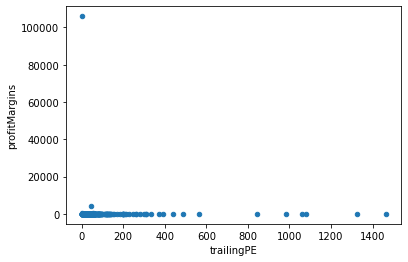

In [168]:
# DF_YFIN_INFO_BASE.describe()

import matplotlib.pyplot as plt

DF_YFIN_INFO_BASE.plot('heldPercentInstitutions','dividendRate',kind = 'scatter')
# DF_YFIN_INFO_BASE.plot('trailingPE','profitMargins',kind = 'scatter')


In [162]:
# Create clusters from the reduced set
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Split into category vs continous features
categorical_features = DF_YFIN_INFO_BASE[['sector','state']]
continuous_features = DF_YFIN_INFO_BASE[['dividendRate',
'heldPercentInstitutions',
'beta',
'profitMargins',
'trailingPE']]

data = DF_YFIN_INFO_BASE

# convert categories to numeric
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

# Standardise data
import numpy as np

data.replace([np.inf, -np.inf], np.nan, inplace=True)


# standardise continuous variables
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

# fill in NaN data points for the array
data_transformed[np.isnan(data_transformed)] = 0



In [163]:


Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

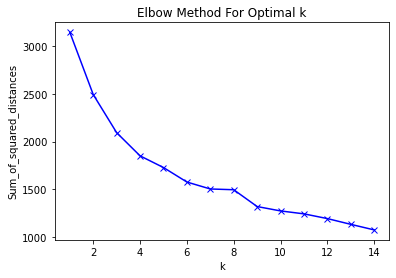

In [164]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [165]:
df = data_transformed
  
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


[[ 2.56731477e-03  6.78940633e-02  6.30662558e-01  9.55832446e-05
   3.31115103e-03  6.67726550e-01  1.90779014e-02  1.58982512e-02
   1.90779014e-02  7.63116057e-02  2.08166817e-17  2.22575517e-02
   3.17965024e-02  6.99523052e-02  1.11287758e-02  6.04133545e-02
   4.76947536e-03  1.73472348e-18 -3.90312782e-18 -2.60208521e-17
   8.67361738e-19  2.16840434e-19  4.33680869e-19  2.16840434e-19
   2.16840434e-19 -6.50521303e-18  2.16840434e-19  4.44089210e-16
   4.33680869e-19 -6.50521303e-18  2.16840434e-19  4.33680869e-19
   1.24900090e-16 -2.08166817e-17  2.16840434e-19 -3.03576608e-18
  -6.50521303e-18  2.16840434e-19  4.71844785e-16  2.16840434e-19
   1.00000000e+00]
 [ 9.65306778e-03  1.17825084e-01  6.06199127e-01  3.71261978e-05
   9.94298709e-03  2.63636364e-01  4.54545455e-02  8.86363636e-02
   7.50000000e-02  9.09090909e-02  1.13636364e-02  6.36363636e-02
   9.09090909e-02  7.72727273e-02  3.86363636e-02  1.20454545e-01
   2.27272727e-02  1.81818182e-02  1.13636364e-02  2.7272

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [167]:
# Find Principal components

x = continuous_features.dropna()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

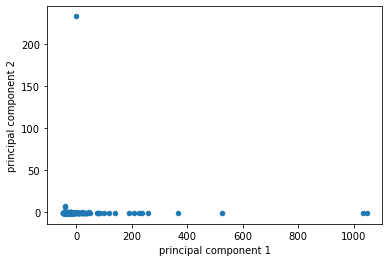

In [154]:
principalDf.head()

principalDf.plot('principal component 1','principal component 2',kind = 'scatter')


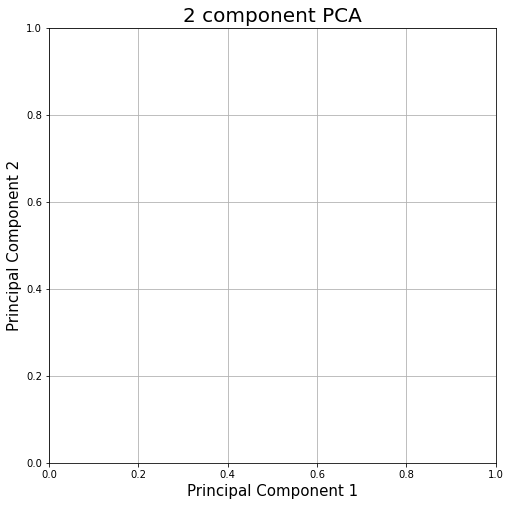

In [151]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# Answer the following Questions
1. How does it compare to the market
    Standardise movements
    Rank the volatility
    